**Statistical Intuitions and Applications**
**Assignment #2**

**Question 1.**
For this question you will use the passenger data of the Titanic ship and examine if there is a relationship between age, gender, or passenger class and having survived the epic shipwreck.

Variables in the data set are as follows:

Survived: Yes=survived; No=lost 

Gender: Gender of the passenger; coded as Male and Female 

Age: Categorized in decades (0-9, 10-19, 20-29, 30-39, 40-49, 50+) 

Class: Passengers aboard the Titanic were placed into three classes: first, second and third. There were also crew members. (1st=first-class, 2nd=second-class; 3rd=third-class; Crew=crew members)

You will select a random sample of 250 passengers from the original data set and analyze the data for those 250 passengers. To select your random sample and save your data set on your computer follow these instructions:   
1. Go to the 4th line of the code: df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')   
2. Change **Path where you want to store the exported CSV file** to where you want to store your data.
3. Change **File Name** to first name.
4. Run the code.

Use this data set to complete your assignment. **Also include this data set in your assignment submission!** Once you save the data, you can open and organize it in Excel to complete your task.


In [29]:
import pandas
# original_data = pandas.read_csv("https://raw.githubusercontent.com/ZUCourses/SIA-Public/main/titanic.csv")
# df=original_data.sample(n=250)
# df.to_csv(r'Titanic.csv')
# print (df.head(10))

        Age  Gender Class Survived
1327  30-39    Male  Crew       No
1722  30-39    Male  Crew       No
1960  40-49    Male   2nd       No
1559  30-39    Male  Crew       No
851   20-29    Male   3rd       No
1670  30-39    Male  Crew       No
104   10-19  Female   2nd      Yes
368   20-29  Female   2nd      Yes
1743  40-49    Male   1st       No
1497  30-39    Male  Crew       No


In [35]:
df=pandas.read_csv("Titanic.csv")

Use the Titanic data set to answer the questions 1.1 through 1.4.  
For your stacked bar graphs, you may use any visualization tool of your choice. A sample code is provided below if you would like to use Python.

In [41]:
#sample code for a stacked bar graph for age vs %survival

import matplotlib.pyplot as plt
 


**1.1** Is having survived the Titanic independent of whether the passenger is female? Include the two-way table and all your calculations in your answer. 

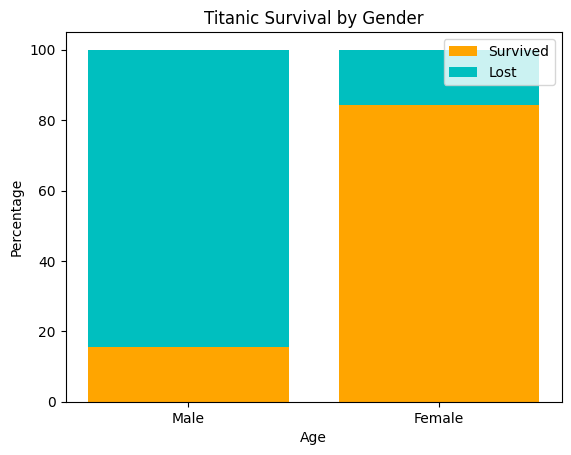

In [37]:
genders=['Male','Female']
x=genders
y1=[]
y2=[]
# Calculate the percentage of people who survived for each age range
for gender in genders:
    num_total = len(df[df['Gender'] == gender])
    num_survived = len(df[(df['Gender'] == gender) & (df['Survived'] == 'Yes')])
    survival_rate = num_survived / num_total * 100
    y1.append(survival_rate)
    y2.append(100-survival_rate)
# plot bars in stack manner
plt.bar(x, y1, color='orange')
plt.bar(x, y2, bottom=y1, color='c')
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend(["Survived", "Lost"])
plt.title("Titanic Survival by Gender")
plt.show()

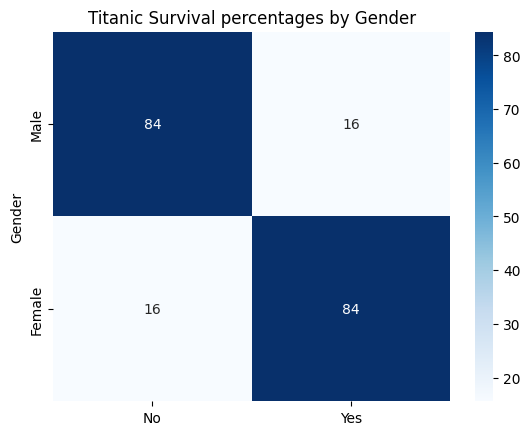

In [38]:
import seaborn as sns
import pandas as pd
# create the dataframe
gender_table = pd.DataFrame({'Gender': ['Male', 'Female'],
                             'No': y2,
                             'Yes': y1})

# set the index to 'Gender'
gender_table.set_index('Gender', inplace=True)

# plot the heatmap
sns.heatmap(gender_table, annot=True, cmap='Blues')
plt.title('Titanic Survival percentages by Gender')
plt.show()

from above graphs we can simply understand that having survived is dependent on gender. 

To determine if survival is independent of gender, we can perform a chi-squared test of independence. The null hypothesis is that the survival of a passenger is independent of their gender, while the alternative hypothesis is that survival is dependent on
gender.
The chi-squared test is a statistical test used to determine the association between two categorical variables. It is used to determine if there is a significant difference between the expected frequencies and the observed frequencies in a contingency table.
The test is based on the chi-squared distribution and measures the degree of association between the two variables. In the chi-squared test, we calculate a test statistic called chi-squared (χ²), which is calculated by summing the squared difference
between the observed and expected frequencies for each category in the contingency table. The chi-squared statistic is then compared to a critical value from the chi-squared distribution with degrees of freedom equal to the number of categories in the
contingency table minus one. If the calculated chi-squared statistic is greater than the critical value, we reject the null hypothesis and conclude that there is a significant association between the two variables. If the calculated chi-squared statistic is less
than or equal to the critical value, we fail to reject the null hypothesis and conclude that there is no significant association between the two variables.

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency



# Create two-way table of survival and gender
table = pd.crosstab(df['Survived'], df['Gender'])

# Print table
print(table)

# Calculate chi-square statistic, p-value, degrees of freedom, and expected values
chi2, pval, dof, expected = chi2_contingency(table)

# Print results
print('Chi-square statistic =', chi2)
print('p-value =', pval)
print('Degrees of freedom =', dof)
print('Expected values:')
print(expected)

Gender    Female  Male
Survived              
No             8   168
Yes           43    31
Chi-square statistic = 88.77287877758982
p-value = 4.428459634363933e-21
Degrees of freedom = 1
Expected values:
[[ 35.904 140.096]
 [ 15.096  58.904]]


To determine if survival on the Titanic is independent of gender, we need to perform a chi-square test of independence. The null hypothesis is that survival and gender are independent, and the alternative hypothesis is that they are not independent.The p-value for this chi-square statistic with 1 degree of freedom is very small (4.428459634363933e-21), which indicates strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that survival on the Titanic is not independent of gender.

**1.2** Is there a relationship between having survived the Titanic and age of the passenger? Include the two-way table, the stacked bar graph, and all your calculations in your answer.

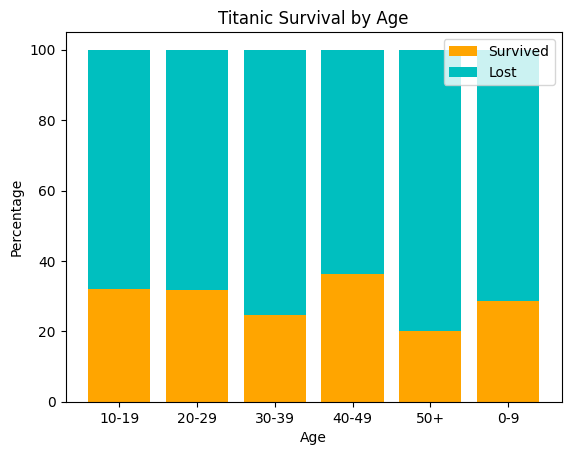

In [42]:
# # create data
# x = [] #enter the age groups
# y1 = [ ] #enter the percentages of those who survived for each age category
# y2 = [ ] #enter the percentages of those who did not survive for each age category

# Define the age ranges
age_ranges = df["Age"].unique().tolist()
x=age_ranges
y1=[]
y2=[]
# Calculate the percentage of people who survived for each age range
for age_range in age_ranges:
    num_total = len(df[df['Age'] == age_range])
    num_survived = len(df[(df['Age'] == age_range) & (df['Survived'] == 'Yes')])
    survival_rate = num_survived / num_total * 100
    y1.append(survival_rate)
    y2.append(100-survival_rate)
# plot bars in stack manner
plt.bar(x, y1, color='orange')
plt.bar(x, y2, bottom=y1, color='c')
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend(["Survived", "Lost"])
plt.title("Titanic Survival by Age")
plt.show()

In [43]:
table = pd.crosstab(df['Survived'], df['Age'])

# Print table
print(table)

# Calculate chi-square statistic, p-value, degrees of freedom, and expected values
chi2, pval, dof, expected = chi2_contingency(table)

# Print results
print('Chi-square statistic =', chi2)
print('p-value =', pval)
print('Degrees of freedom =', dof)
print('Expected values:')
print(expected)

Age       0-9  10-19  20-29  30-39  40-49  50+
Survived                                      
No          5     19     67     52     21   12
Yes         2      9     31     17     12    3
Chi-square statistic = 2.487956484198014
p-value = 0.7783077463028846
Degrees of freedom = 5
Expected values:
[[ 4.928 19.712 68.992 48.576 23.232 10.56 ]
 [ 2.072  8.288 29.008 20.424  9.768  4.44 ]]


This table represents the survival counts for different age ranges on the Titanic, broken down by whether the passenger survived or not. The Chi-square test statistic for testing the independence of age and survival is 2.49 with a p-value of 0.778, suggesting that there is no significant association between age and survival on the Titanic. 

**1.3** Is there a relationship between having survived the Titanic and passenger class? Include the two-way table, the stacked bar graph, and all your calculations in your answer. 

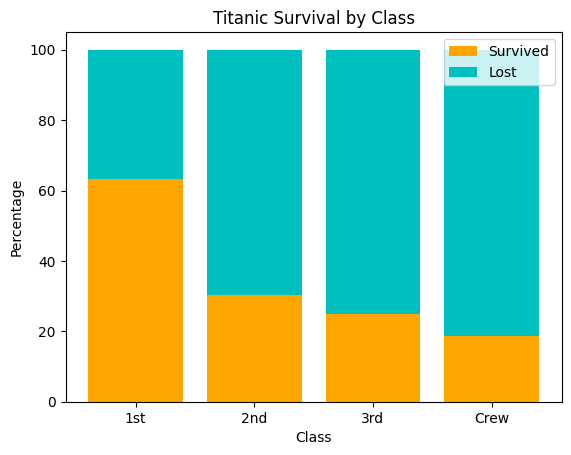

In [44]:
classes=['1st','2nd','3rd','Crew']
x=classes
y1=[]
y2=[]
# Calculate the percentage of people who survived for each age range
for clas in classes:
    num_total = len(df[df['Class'] == clas])
    num_survived = len(df[(df['Class'] == clas) & (df['Survived'] == 'Yes')])
    survival_rate = num_survived / num_total * 100
    y1.append(survival_rate)
    y2.append(100-survival_rate)
# plot bars in stack manner
plt.bar(x, y1, color='orange')
plt.bar(x, y2, bottom=y1, color='c')
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.legend(["Survived", "Lost"])
plt.title("Titanic Survival by Class")
plt.show()

We can see that the first-class passengers had the highest proportion of survivors, followed by second-class, then third-class and crew. 

In [46]:
table = pd.crosstab(df['Survived'], df['Class'])

# Print table
print(table)

# Calculate chi-square statistic, p-value, degrees of freedom, and expected values
chi2, pval, dof, expected = chi2_contingency(table)

# Print results
print('Chi-square statistic =', chi2)
print('p-value =', pval)
print('Degrees of freedom =', dof)
print('Expected values:')
print(expected)

Class     1st  2nd  3rd  Crew
Survived                     
No         15   23   60    78
Yes        26   10   20    18
Chi-square statistic = 28.740728214986813
p-value = 2.5386927970393688e-06
Degrees of freedom = 3
Expected values:
[[28.864 23.232 56.32  67.584]
 [12.136  9.768 23.68  28.416]]


The null hypothesis is that there is no relationship between the two variables.The chi-square statistic is 28.74 with 3 degrees of freedom, and the p-value is very small (2.54e-06). This indicates strong evidence against the null hypothesis and suggests that there is a relationship between passenger class and survival.

**1.4** Did traveling as third-class increase the risk of not surviving the shipwreck compared to traveling as a firt-class passenger? If so, how much? 

To determine if traveling as a third-class passenger increased the risk of not surviving the shipwreck compared to traveling as a first-class passenger, we need to compare the survival rates of each class.

In [48]:
y1

[63.41463414634146, 30.303030303030305, 25.0, 18.75]

First-class survival rate: 63%
Third-class survival rate: 25% 

From these calculations, we can see that traveling as a third-class passenger significantly increased the risk of not surviving the shipwreck compared to traveling as a first-class passenger. The survival rate for first-class passengers was almost two and a half times higher than the survival rate for third-class passengers.

In [55]:
f_s_r=100-y1[0]
t_s_r=100-y1[2]
print(f"first class survival risk: {f_s_r}%")
print(f"third class survival risk: {t_s_r}%")

first class survival risk: 36.58536585365854%
third class survival risk: 75.0%


In [56]:
print(f"Risk increases: {t_s_r-f_s_r}%")

Risk increases: 38.41463414634146%


YOUR ANSWER GOES HERE.

**Question 2.**
Did you know that you can access various statistical informtion covering demographic, social, and the economic sectors of your emirate? Now that you are taking a statistics class you should become familiar with those websites where you can follow up the most up-to-date indicators and variables in your emirate.
For this assignment, we will utilize the Digital Statistics (https://www.dsc.gov.ae/en-us/EServices/Pages/smart-statistical-suite.aspx) website of the Emirate of Dubai.

Visit the Digital Statistics website and look around to find data on **two** topics that are of interest to you. Briefly explain the data sets and the variables and download the two-way tables that display the data. Include these two-way tables in your assignment submission. Make sure the two-way table is of appropriate complexity for an assignment. Below is an example:
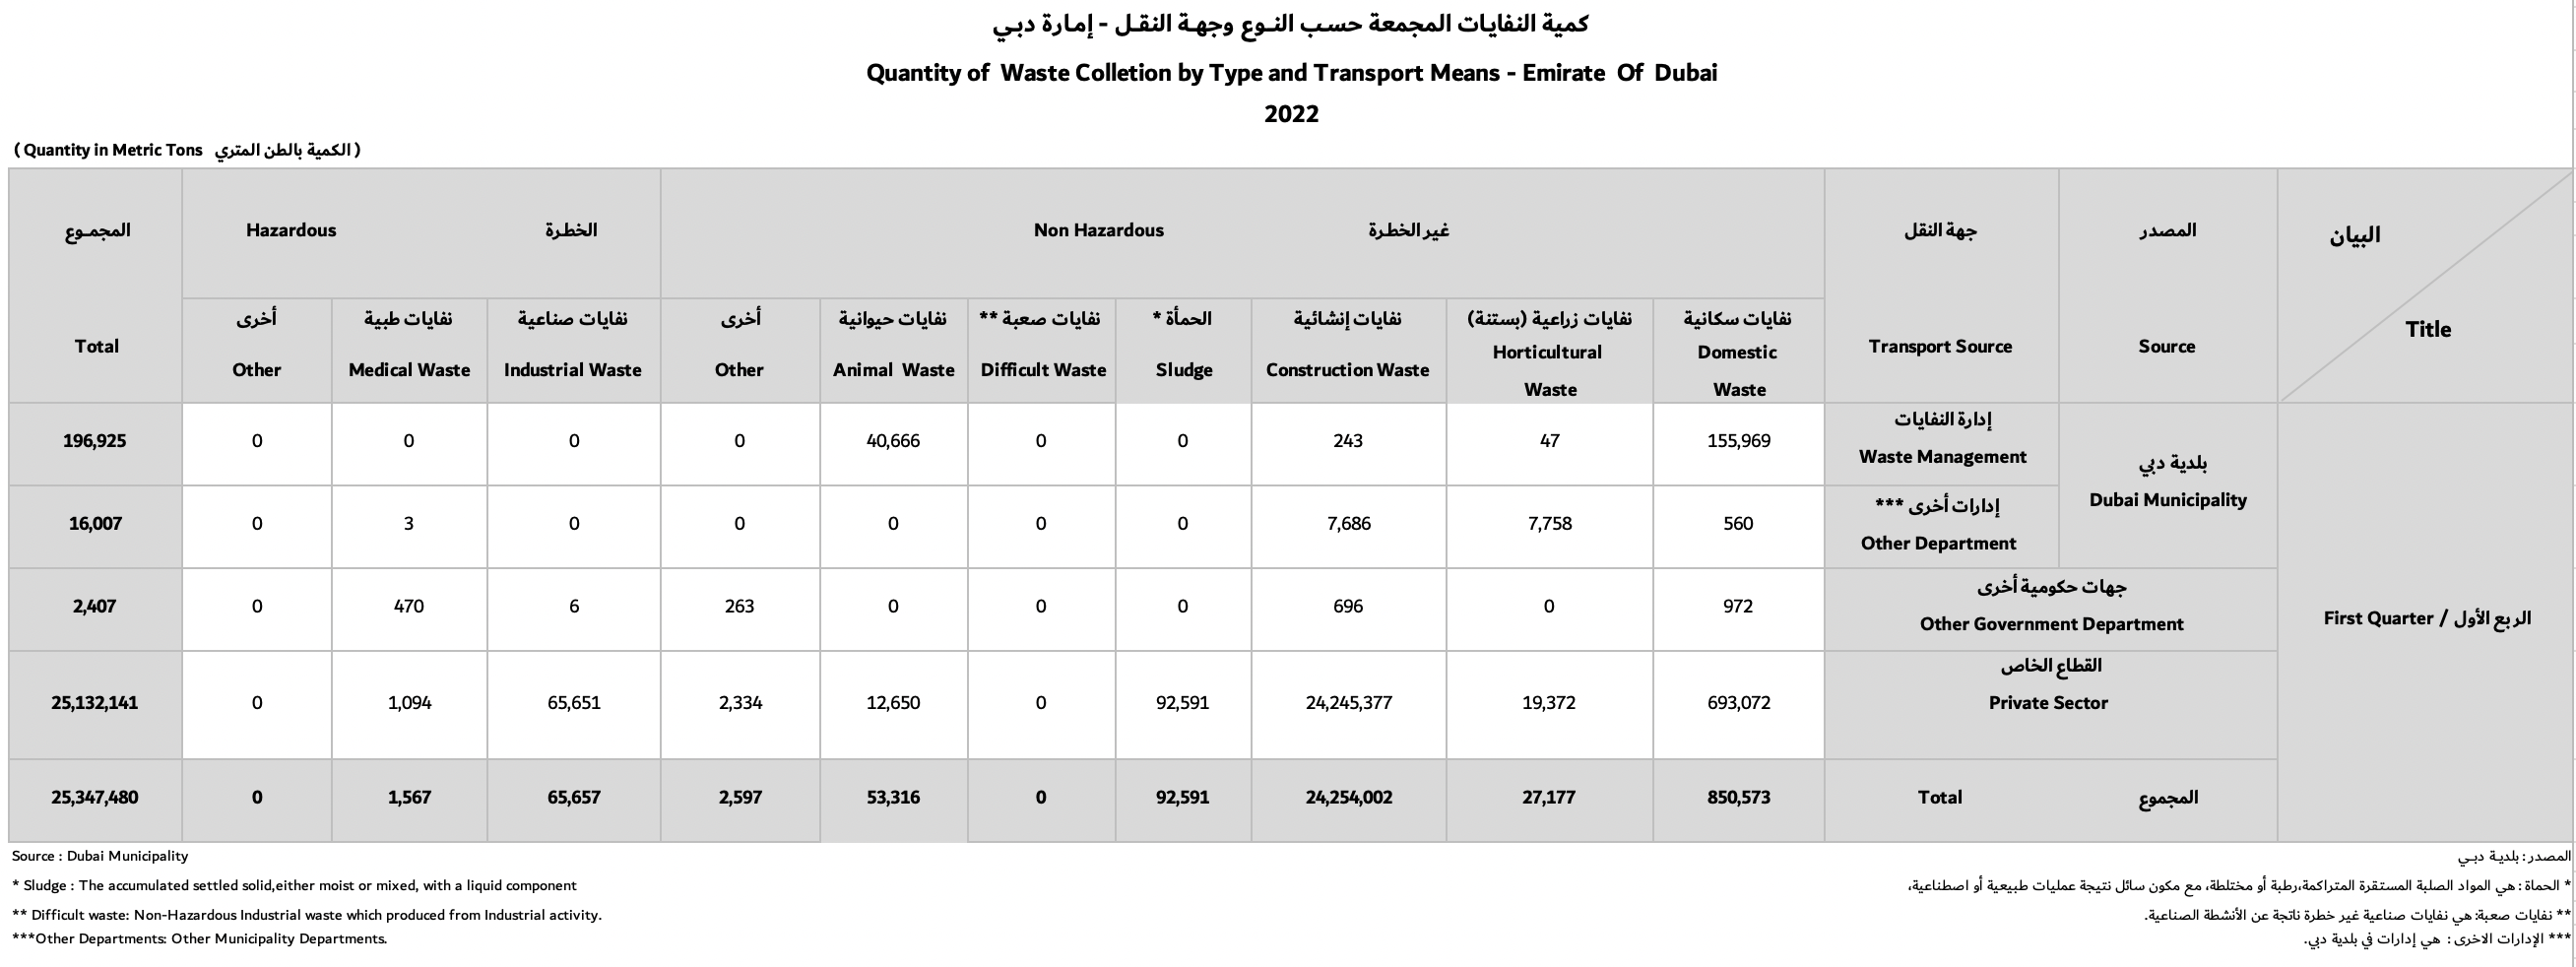

Use these two-way tables to write and solve your own probability problems using the following guidelines:

**a** Write and solve 5 different probability problems. Interpret your answers in a way that is accessible to general public.

**b** All problems should involve probabilities of combined events (combined with "and" or "or")

**c** At least two problems should involve identifying independence.

**d** At least two problems should involve identifying mutually exclusive (disjoint) events.

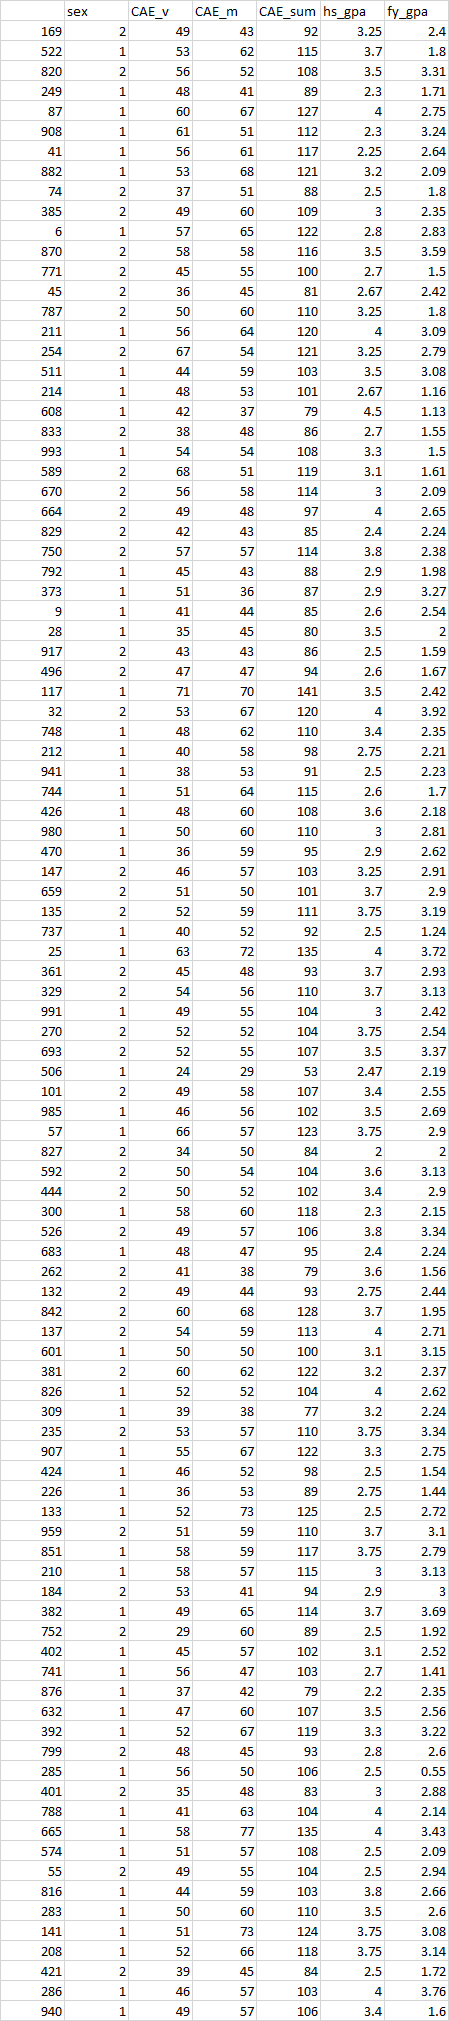

**2.1:** What is the probability that a randomly selected student from this dataset is female and has an hs_gpa of at least 3.0?

Answer Below:

total student= 100

Number of Student who is female and has an hs_gpa of at least 3.0= 29

In [2]:
P=29/100
P

0.29

so, the probability that a randomly selected student from this dataset is female and has an hs_gpa of at least 3.0 = 0.29

**2.2:** What is the probability that a randomly selected student from this dataset has an hs_gpa of at least 3.5?

the number of student who has hs_gpa of at least 3.5=40

In [3]:
P=40/100
P

0.4

the probability that a randomly selected student from this dataset has an hs_gpa of at least 3.5=0.4

**2.3:** What is the probability that a randomly selected student from this dataset has an hs_gpa of less than 2.5, given that the student is female?

the number of student who has hs_gpa of less than 2.5, given that the student is female=2

In [4]:
P=2/100
P

0.02

the probability that a randomly selected student from this dataset has an hs_gpa of less than 2.5, given that the student is female = 0.02

**2.4:** What is the probability that a randomly selected student from this dataset has an fy_gpa of less than 2.0?

the number of student who has hs_gpa of less than 2=24

In [5]:
P=24/100
P

0.24

 the probability that a randomly selected student from this dataset has an fy_gpa of less than 2.0=0.24

**2.5:** What is the probability that a randomly selected student from this dataset is male, given that the student has a CAE_sum score of at least 120?

the number of student who is male, given that the student has a CAE_sum score of at least 120= 11

In [6]:
p=11/100
p

0.11

 the probability that a randomly selected student from this dataset is male, given that the student has a CAE_sum score of at least 120 = 0.11

**Question 3.** 
The average daily temperature in Abu Dhabi over a decade was T˚C with a standard deviation of SD˚C, where these values are obtained by running the code cell below. Assume that the temperatures follow an approximately normal distribution.

In [72]:
# Run this code which will provide you the average temperature and standard deviation. 
from numpy import random
t = round(random.normal(loc = 34, scale =1.1),1)
s = round(random.normal(loc = 3, scale =1.1),1)
print("Average Temperature in Abu Dhabi = T =", t, "and Standard Deviation = SD =", s) 

Average Temperature in Abu Dhabi = T = 33.7 and Standard Deviation = SD = 3.3


**3.1** What is the probability of observing a temperature of at least T-SD degrees Celcius in Abu Dhabi on a randomly chosen day.

Probability= Area Under the Curve

In [73]:
T_SD=t-s
T_SD

30.400000000000002

P(X<30.4)= 0.15869999999999995

the probability of observing a temperature of at least T-SD degrees Celcius in Abu Dhabi on a randomly chosen day=15.87%

**3.2** What is the probability that the temperature on a randomly chosen day will be below 2T/3? 

In [74]:
critical_point=2*t/3
print("2T/3: ",critical_point)

2T/3:  22.46666666666667


P(X<22.46)= 0.00029999999999996696

the probability that the temperature on a randomly chosen day will be below 2T/3= 0.0299 %

**3.3** How hot are the coldest 5% of the days in Abu Dhabi? 

the coldest 5% of the days in Abu Dhabi = Below 28.272 degrees Celcius [from online calculator]

**3.4** How high would the temperature be in Abu Dhabi to be considered unusually hot? Explain using probabilities.

the temperature be in Abu Dhabi to be considered unusually hot 2.5% from the upper limit of normal curve.

So we can value from the online calculator 

so, the temperature be in Abu Dhabi to be considered unusually hot above 40.168 degree celcius

**3.5** Could you still estimate the probabilities above if the distribution was positively skewed by the presence of some very hot days?

if the distribution of temperature in Abu Dhabi is positively skewed, we can still estimate the probability of observing unusually hot temperatures using the median and the IQR(interquartile range). However, the accuracy of this estimation depends on the shape and the parameters of the distribution, and it may not be as accurate as using a normal distribution if the distribution is significantly different from normal. 


In [ ]:
#optional code cell if you choose to use Python for your answers

**Question 4.**

Sports can be considered random systems due to elements of chance and luck, serving as a fun playground for probability and statistics analyses. For this assignment, you will examine the goals scored by the football clubs in the UAE Pro League! Here is the website where you can see the results of all games played by all clubs in the Pro League: (https://www.uaeproleague.ae/en/fixtures). You can filter by season and club to see the number of goals each club scored during all 26 games in the season. 

Choose a club and a season and get a list of the results for the club's 26 games during the season. **Download a pdf of that page to include in your submission.**

Then develop a probability distribution of the random variable X = number of goals scored per game (a sample table is provided below) and answer the following questions based on the probability distribution.
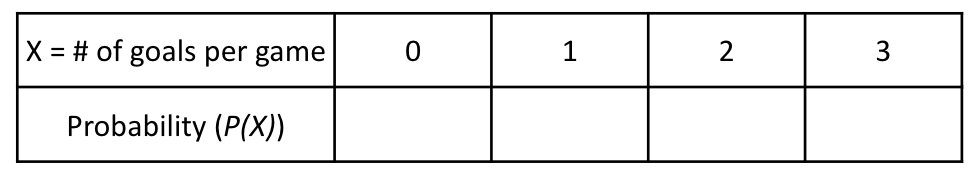

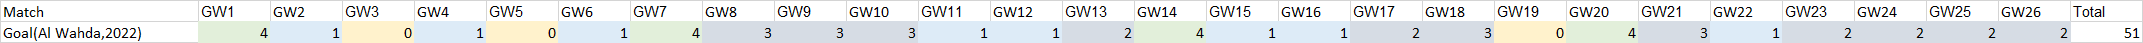

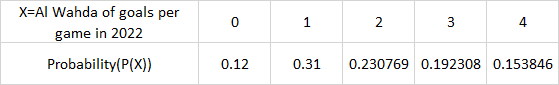

**4.1** What is the probability that Club Y will not score any goals during a game?

P(X=0)= 0.12 

**4.2** What is the probability that Club Y will score at least 1 goal during a game?

the probability that Club will score at least 1 goal during a game = 1-P(X=0)

P(X>0)=1-0.12
=0.88


**4.3** How many goals would Club Y score to be considered unusual? Explain using probabilities.

More than 4 goals will be considered unusal for the club becasue they scored maximum 4 goals to their previous sesssion

**4.4** Find the expected number of goals per game. Interpret your answer in context.

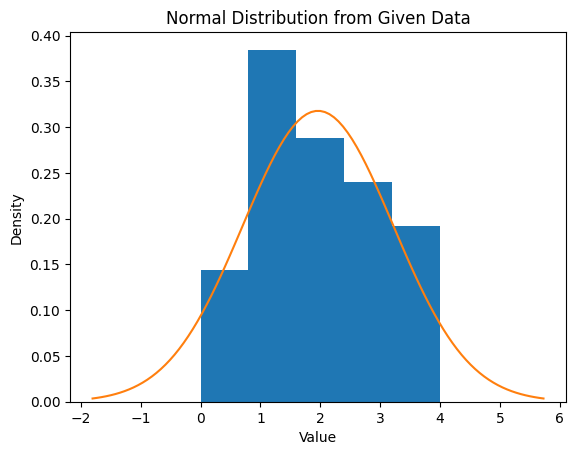

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create a numpy array from the given values
data = np.array([4, 1, 0, 1, 0, 1, 4, 3, 3, 3, 1, 1, 2, 4, 1, 1, 2, 3, 0, 4, 3, 1, 2, 2, 2, 2])

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# Generate a range of values for the x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Calculate the normal distribution for the given mean and standard deviation
y = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Plot the histogram of the data and the normal distribution curve
plt.hist(data, bins=5, density=True)
plt.plot(x, y)
plt.title("Normal Distribution from Given Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


If we consider the above cuve as only bar chart we will see the club scroed 1 goal for maximum time, so the expected number of goal would be 1. 

**4.5** Find the standard deviation of X. Interpret the SD in context.

In [77]:
#from the previous answer
print("Standard Deviation: ",std)

Standard Deviation:  1.2551668363139015


#References: Stack_overflow